In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [2]:
mnist_train = torchvision.datasets.FashionMNIST(root='~/Datasets/FashionMNIST', train=True,
download=True, transform=transforms.ToTensor())
mnist_test = torchvision.datasets.FashionMNIST(root='~/Datasets/FashionMNIST', train=False,
download=True, transform=transforms.ToTensor())

In [3]:
#定义模型参数
num_inputs, num_outputs, num_hiddens = 784, 10, 256

#定义随机初始化模型参数的函数
W1 = torch.tensor(np.random.normal(0, 0.01, (num_hiddens, num_inputs)), dtype=torch.float, requires_grad=True)
b1 = torch.zeros(num_hiddens, dtype=torch.float, requires_grad=True)
W2 = torch.tensor(np.random.normal(0, 0.01, (num_outputs, num_hiddens)), dtype=torch.float, requires_grad=True)
b2 = torch.zeros(num_outputs, dtype=torch.float, requires_grad=True)
params = [W1, b1, W2, b2]

In [4]:
#定义linear层函数
def linear(X, w, b):
    return torch.matmul(X, w.t())+ b

#定义隐藏层激活函数
def relu(X):
    return torch.max(input=X, other=torch.tensor(0.0))

#定义分类模型
def net(X):
    X = X.view((-1, num_inputs))          
    linear_1 = linear(X, W1, b1)
    R = relu(linear_1)
    linear_2 = linear(R, W2, b2)
    #S = Softmax(linear_2) #CrossEntropyLoss损失函数中自带Softmax
    return linear_2

#定义交叉熵损失函数，CrossEntropyLoss自带Softmax，所以分类模型中不用加Softmax层
loss = torch.nn.CrossEntropyLoss()

#定义随机梯度下降函数
def SGD(params, lr):
    for param in params:
        param.data -= lr * param.grad
        
#定义计算测试集损失函数
def evaluate_loss(data_iter, net):
    l, n = 0.0, 0
    for X, y in data_iter:
        l += loss(net(X),y).sum().item()
        n += y.shape[0]
    return l / n

In [5]:
#定义训练参数
batch_size, num_epochs, lr = 256, 20, 0.01

#划分数据集
train_iter = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size, shuffle=True,num_workers=0)
test_iter = torch.utils.data.DataLoader(mnist_test, batch_size=batch_size, shuffle=False,num_workers=0)

#训练模型
loss_train = []
loss_test = []
for epoch in range(num_epochs):
    train_l_sum, test_l_sum, n = 0.0, 0.0, 0
    for X, y in train_iter:
        l = loss(net(X),y).sum() 
        l.backward()       #计算损失     
        SGD(params, lr)       #更新梯度
        W1.grad.data.zero_()
        b1.grad.data.zero_()
        W2.grad.data.zero_()
        b2.grad.data.zero_()
        train_l_sum += l.item()
        n += y.shape[0]
    loss_train.append(train_l_sum/n)
    loss_test.append(evaluate_loss(test_iter,net))
    print('epoch %d, loss_train %f, loss_test %f '% (epoch+1, loss_train[epoch], loss_test[epoch]))

epoch 1, loss_train 0.008420, loss_test 0.007440 
epoch 2, loss_train 0.005934, loss_test 0.005044 
epoch 3, loss_train 0.004346, loss_test 0.004029 
epoch 4, loss_train 0.003646, loss_test 0.003547 
epoch 5, loss_train 0.003284, loss_test 0.003273 
epoch 6, loss_train 0.003060, loss_test 0.003080 
epoch 7, loss_train 0.002895, loss_test 0.002941 
epoch 8, loss_train 0.002764, loss_test 0.002810 
epoch 9, loss_train 0.002650, loss_test 0.002703 
epoch 10, loss_train 0.002552, loss_test 0.002613 
epoch 11, loss_train 0.002465, loss_test 0.002532 
epoch 12, loss_train 0.002389, loss_test 0.002469 
epoch 13, loss_train 0.002322, loss_test 0.002404 
epoch 14, loss_train 0.002265, loss_test 0.002352 
epoch 15, loss_train 0.002212, loss_test 0.002307 
epoch 16, loss_train 0.002168, loss_test 0.002277 
epoch 17, loss_train 0.002130, loss_test 0.002234 
epoch 18, loss_train 0.002094, loss_test 0.002196 
epoch 19, loss_train 0.002063, loss_test 0.002172 
epoch 20, loss_train 0.002032, loss_test

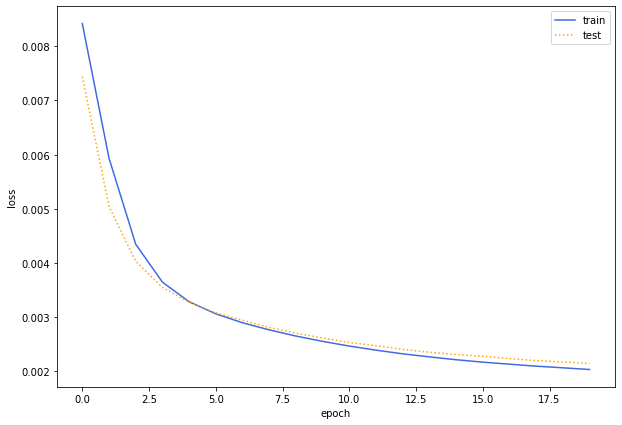

In [6]:
plt.figure(figsize=(10,7))
plt.plot(loss_train,label='train',color='royalblue')
plt.plot(loss_test,label='test',linestyle=':', color='orange')
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend()
plt.show()